In [43]:
import shapely

In [44]:
from shapely.geometry import Point

In [45]:
point = Point(0.0, 0.0)

In [46]:
buffer_polygon = point.buffer(5.0)

In [47]:
print(buffer_polygon.area)

78.41371226364852


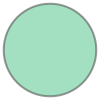

In [48]:
buffer_polygon

In [49]:
buffer_polygon.is_simple

True

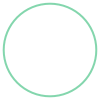

In [50]:
buffer_polygon.boundary

In [51]:
buffer_polygon.boundary.is_ring

True

In [52]:
buffer_polygon.boundary.is_closed

True

In [53]:
import math

In [54]:
star = shapely.geometry.Polygon([(math.cos(a), math.sin(a)) for a in (a*3/5*math.pi*2 for a in range(5))])

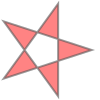

In [55]:
star

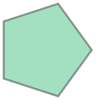

In [56]:
star.convex_hull

In [57]:
star.is_empty

False

In [58]:
star.is_simple

False

In [59]:
star.is_valid

False

In [60]:
shapely.is_valid_reason(star)

'Self-intersection[-0.118033988749895 0.363271264002681]'

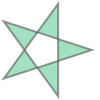

In [61]:
shapely.make_valid(star)

In [62]:
star = shapely.make_valid(star)

In [63]:
buffer_polygon.difference?

Signature: buffer_polygon.difference(other, grid_size=None)
Docstring:
Returns the difference of the geometries.

Refer to `shapely.difference` for full documentation.
File:      /lib/python3.12/site-packages/shapely/geometry/base.py
Type:      method


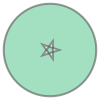

In [64]:
buffer_polygon.difference(star)

In [65]:
import geopandas as gp

In [66]:
%pip install matplotlib

In [67]:
shapely.affinity.affine_transform?

Signature: shapely.affinity.affine_transform(geom, matrix)
Docstring:
Return a transformed geometry using an affine transformation matrix.

The coefficient matrix is provided as a list or tuple with 6 or 12 items
for 2D or 3D transformations, respectively.

For 2D affine transformations, the 6 parameter matrix is::

    [a, b, d, e, xoff, yoff]

which represents the augmented matrix::

    [x']   / a  b xoff \ [x]
    [y'] = | d  e yoff | [y]
    [1 ]   \ 0  0   1  / [1]

or the equations for the transformed coordinates::

    x' = a * x + b * y + xoff
    y' = d * x + e * y + yoff

For 3D affine transformations, the 12 parameter matrix is::

    [a, b, c, d, e, f, g, h, i, xoff, yoff, zoff]

which represents the augmented matrix::

    [x']   / a  b  c xoff \ [x]
    [y'] = | d  e  f yoff | [y]
    [z']   | g  h  i zoff | [z]
    [1 ]   \ 0  0  0   1  / [1]

or the equations for the transformed coordinates::

    x' = a * x + b * y + c * z + xoff
    y' = d * x + e * y + f * z + yoff


In [68]:
gdf = gp.GeoDataFrame(geometry=[buffer_polygon, shapely.affinity.affine_transform(star, [3, 0, 0, 3, 4, 3])])

<AxesSubplot:>

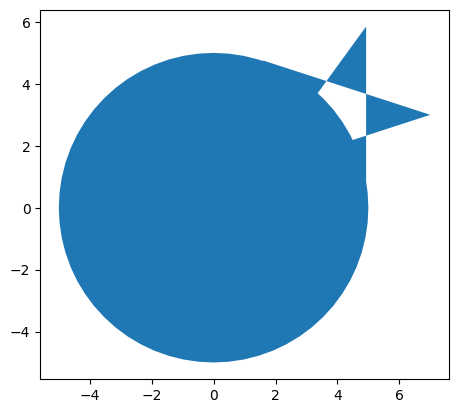

In [69]:
gdf.plot()

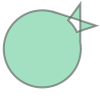

In [70]:
gdf.unary_union

In [71]:
import shapely.geos

In [72]:
shapely.geos.geos_capi_version

(1, 18, 1)

In [73]:
shapely.__version__

'2.0.2'

In [74]:
shapely.geos_version_string

'3.12.1'

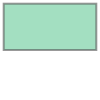

In [78]:
shapely.geometry.box(0,0,2, 1).intersection(shapely.geometry.box(1, .5,3, 5))

In [76]:
gdf.geometry.apply(shapely.is_valid)

0    True
1    True
Name: geometry, dtype: bool